In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import Callback

from keras.datasets import mnist

SEED = 2017

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_val, y_val) = mnist.load_data()

11493376/11490434 [==============================] - 14s 1us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_val.shape

(10000, 28, 28)

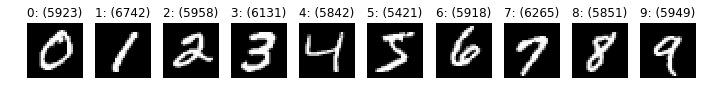

In [5]:
# Plot first image of each label
unique_labels = set(y_train)
plt.figure(figsize=(12, 12))

i = 1
for label in unique_labels:
    image = X_train[y_train.tolist().index(label)]
    plt.subplot(10, 10, i)
    plt.axis('off')
    plt.title("{0}: ({1})".format(label, y_train.tolist().count(label)))
    i += 1
    _ = plt.imshow(image, cmap='gray')
plt.show()

In [6]:
# Normalize data
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.

In [8]:
# One-Hot-Encode labels
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_val = to_categorical(y_val, n_classes)

In [11]:
y_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [12]:
# Flatten data - we threat the image as a sequential array of values
X_train = np.reshape(X_train, (60000, 784))
X_val = np.reshape(X_val, (10000, 784))

#### Sigmoid

In [13]:
model_sigmoid = Sequential()

In [14]:
model_sigmoid.add(Dense(700, input_dim = 784, activation= 'sigmoid'))
model_sigmoid.add(Dense(700, activation='sigmoid')) 
model_sigmoid.add(Dense(350, activation='sigmoid')) 
model_sigmoid.add(Dense(100, activation='sigmoid')) 
model_sigmoid.add(Dense(10, activation='softmax'))

# Compile model with SGD
model_sigmoid.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#### ReLU

In [15]:
model_relu = Sequential()
model_relu.add(Dense(700, input_dim=784, activation='relu'))
model_relu.add(Dense(700, activation='relu'))
model_relu.add(Dense(350, activation='relu')) 
model_relu.add(Dense(100, activation='relu')) 
model_relu.add(Dense(10, activation='softmax'))

# Compile model with SGD
model_relu.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [16]:
class history_loss(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

In [17]:
n_epochs = 10
batch_size = 256
validation_split = 0.2

In [18]:
history_sigmoid = history_loss()

model_sigmoid.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
 callbacks=[history_sigmoid],
 validation_split=validation_split, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 43s - loss: 2.3105 - acc: 0.1091 - val_loss: 2.3022 - val_acc: 0.1060
Epoch 2/10
 - 41s - loss: 2.3010 - acc: 0.1140 - val_loss: 2.3015 - val_acc: 0.1060
Epoch 3/10
 - 42s - loss: 2.3008 - acc: 0.1140 - val_loss: 2.3019 - val_acc: 0.1060
Epoch 4/10
 - 40s - loss: 2.3005 - acc: 0.1140 - val_loss: 2.3021 - val_acc: 0.1060
Epoch 5/10
 - 38s - loss: 2.3005 - acc: 0.1137 - val_loss: 2.3014 - val_acc: 0.1060
Epoch 6/10
 - 43s - loss: 2.3001 - acc: 0.1140 - val_loss: 2.3008 - val_acc: 0.1060
Epoch 7/10
 - 36s - loss: 2.2999 - acc: 0.1140 - val_loss: 2.3008 - val_acc: 0.1060
Epoch 8/10


KeyboardInterrupt: 

In [19]:
history_relu = history_loss()
model_relu.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
 callbacks=[history_relu],
 validation_split=validation_split, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 34s - loss: 1.7447 - acc: 0.5991 - val_loss: 0.9907 - val_acc: 0.8193
Epoch 2/10
 - 36s - loss: 0.6955 - acc: 0.8448 - val_loss: 0.4757 - val_acc: 0.8857
Epoch 3/10
 - 39s - loss: 0.4449 - acc: 0.8827 - val_loss: 0.3638 - val_acc: 0.9028
Epoch 4/10
 - 39s - loss: 0.3665 - acc: 0.8987 - val_loss: 0.3246 - val_acc: 0.9091
Epoch 5/10
 - 34s - loss: 0.3262 - acc: 0.9074 - val_loss: 0.2935 - val_acc: 0.9173
Epoch 6/10
 - 46s - loss: 0.2993 - acc: 0.9145 - val_loss: 0.2735 - val_acc: 0.9235
Epoch 7/10
 - 44s - loss: 0.2792 - acc: 0.9195 - val_loss: 0.2564 - val_acc: 0.9264
Epoch 8/10
 - 46s - loss: 0.2622 - acc: 0.9250 - val_loss: 0.2437 - val_acc: 0.9307
Epoch 9/10
 - 45s - loss: 0.2481 - acc: 0.9290 - val_loss: 0.2321 - val_acc: 0.9358
Epoch 10/10
 - 47s - loss: 0.2359 - acc: 0.9324 - val_loss: 0.2202 - val_acc: 0.9382


In [23]:
predict = model_relu.predict(X_train[:10])

In [26]:
np.argmax(predict[0])

5